In [1]:
data <- c(5.2, 5.5, 5.5, 4.1, 3.6, 4.2, 4.3, 5.0, 4.1, 4.5,
         4.2, 4.8, 5.0, 4.5, 5.2, 5.5, 5.2, 5.2, 4.4, 4.9,
         4.5, 5.5, 5.5, 5.1, 5.6, 5.4, 4.8, 5.3, 5.0, 4.5,
         5.1, 4.8, 5.0, 5.4, 5.1, 5.6, 4.5, 5.3, 4.9, 5.1,
         5.1, 4.9, 5.2, 4.9, 4.7, 5.6, 5.5, 4.7, 5.0, 6.0)
data

[1] 5.2 5.5 5.5 4.1 3.6 4.2 4.3 5.0 4.1 4.5 4.2 4.8 5.0 4.5 5.2 5.5 5.2 5.2 4.4
[20] 4.9 4.5 5.5 5.5 5.1 5.6 5.4 4.8 5.3 5.0 4.5 5.1 4.8 5.0 5.4 5.1 5.6 4.5 5.3
[39] 4.9 5.1 5.1 4.9 5.2 4.9 4.7 5.6 5.5 4.7 5.0 6.0

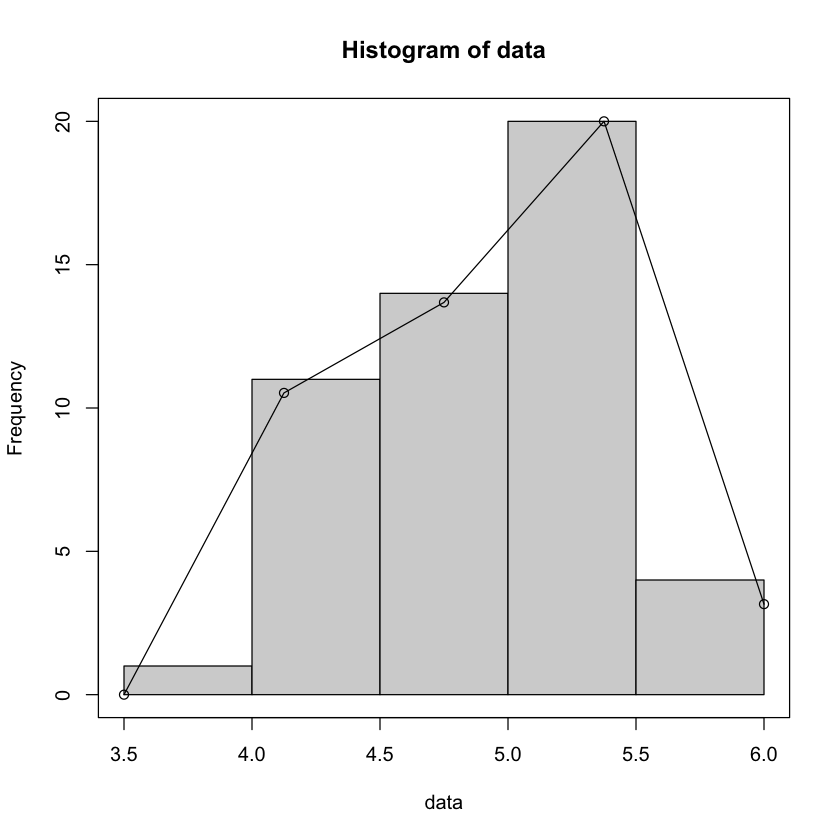

In [2]:
mn <- min(data)
mx <- max(data)
pt <- hist(data)
# pt <- hist(data, breaks=seq(mn, mx, 0.2), right=F)
# pt <- hist(data, breaks=seq(mn, mx, 0.3), right=F)
par(new = T)
ft <- plot(pt$density, type = 'o', xaxt = 'n', yaxt = 'n', xlab = '', ylab = '')
# plot으로 그린 꺾은 선이 ft이다.

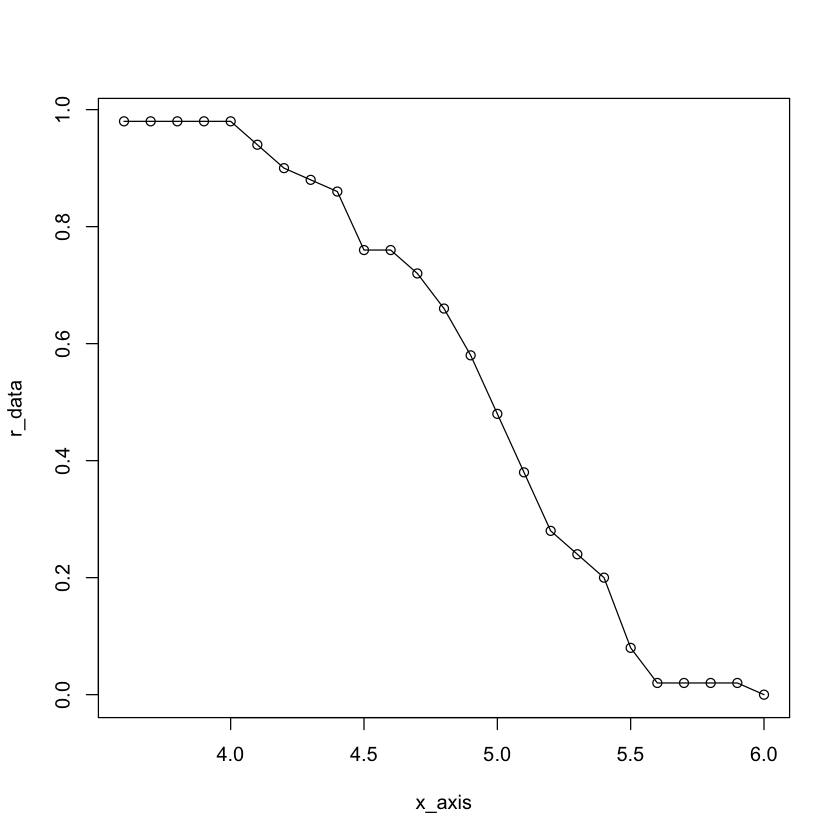

In [3]:
len <- length(data)
r_data <- c()
last_p <- 0
x_axis <- seq(mn, mx, 0.1)
for(i in x_axis){
    if(length(r_data)==0){
        last_p <- 0
    }else{
        last_p <- r_data[length(r_data)]       
    }
    cnt <- length(data[as.character(data)==as.character(i)])
    new_p <- last_p + cnt/len
    r_data <- c(r_data, new_p)
}
r_data <- 1 - r_data
# 막대그래프로 표시
# rt <- barplot(r_data,names=x_axis)
rt <- plot(x_axis, r_data, type = 'o')

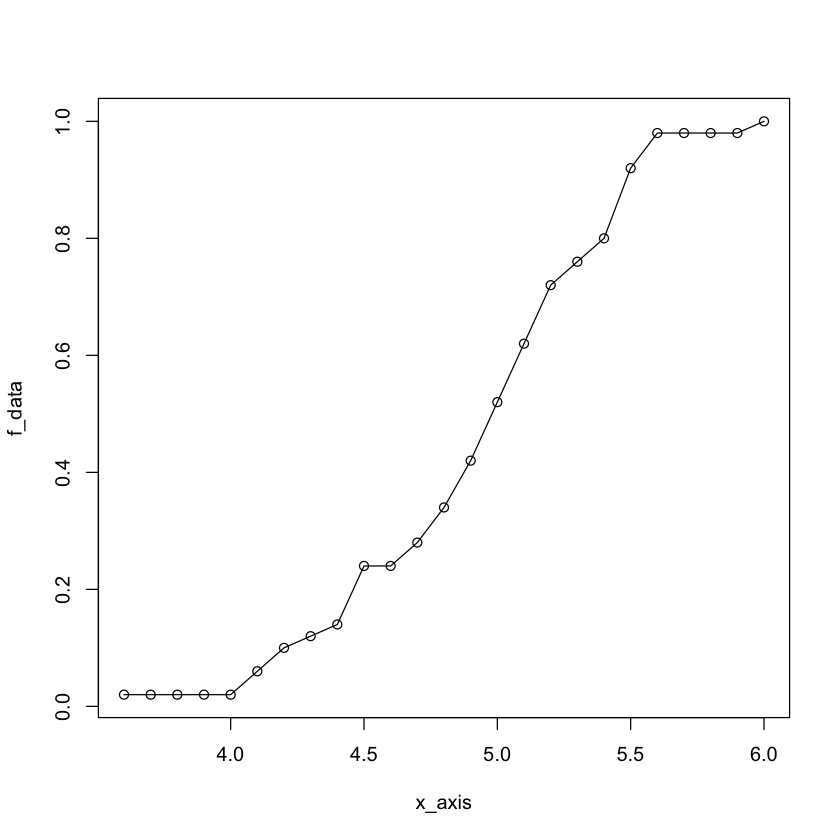

In [6]:
#불신뢰도는 1-r_data를 해준다
f_data <- 1-r_data
ft <- plot(x_axis, f_data, type='o')

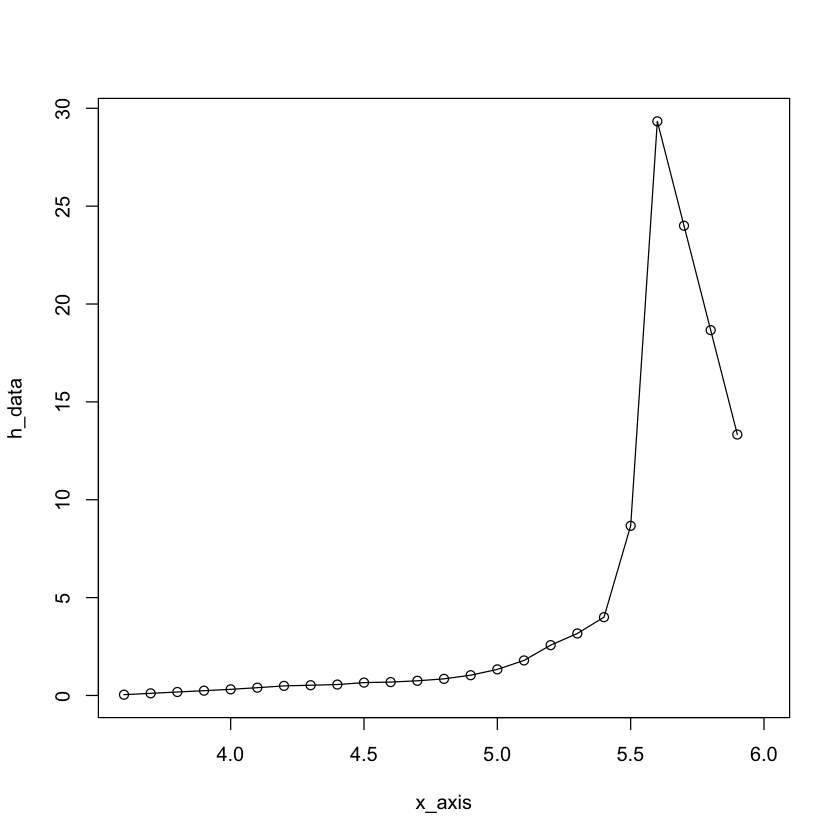

In [10]:
# h(t) = f(t)/R(t) 로 계산한다.
f_data <- NULL
for (i in 1:4) {
  distance <- 6
  dist_value <- (pt$density[i + 1] - pt$density[i])/distance
  for(j in 0:(distance-1)){
    f_data <- c(f_data,pt$density[i]+dist_value*j)
  }
}
f_data <- c(f_data, pt$density[length(pt$density)])
h_data <- f_data/r_data
ht <- plot(x_axis, h_data, type='o')